In [8]:
# from torchvision.models import resnet50
# model = resnet50(weights="IMAGENET1K_V1")

In [9]:
%load_ext autoreload
%autoreload 2


import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image

import pandas as pd


import psutil
import os
from timeit import default_timer as timer

from tqdm.notebook import tqdm

from utilities import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
                                )

# batch_size = 64

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [11]:
net = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Using cache found in /home/mike/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


Train

In [12]:
# for epoch in range(1):  # loop over the dataset multiple times

#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = loss_fn(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         if i % 100 == 99:    # print every 2000 mini-batches
#             print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
#             running_loss = 0.0

# print('Finished Training')

# Test set inference experiments

In [13]:
report = pd.DataFrame(columns=['batch_size', 'cpu_util', 'memory_util', 'time_taken_(sec)'])

In [14]:
# trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [15]:
#  some codde here....
for i in tqdm(range(16)):
    correct = 0
    total = 0

    net.eval()

    batch_size = 2 ** i    
    # trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=2)    
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    start_time = timer()
    psutil.cpu_percent(0) # Mark cpu utilization

    with torch.inference_mode():
        for idx, data in enumerate(testloader):
            # print('The CPU usage is: ', psutil.cpu_percent(0))
            
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if idx == 0:
                mem = psutil.virtual_memory()[3]/1000000000

    end_time = timer()
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    cpu = psutil.cpu_percent(0)
    print('The CPU usage is: ', cpu)

    report = pd.concat([report, pd.DataFrame({'batch_size': 2 ** i,
                                    'cpu_util' : cpu, 
                                    'memory_util': mem, 
                                    'time_taken_(sec)' : end_time - start_time},index=[i])])

  0%|          | 0/16 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  67.7


/tmp/ipykernel_33647/3943354465.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  report = pd.concat([report, pd.DataFrame({'batch_size': 2 ** i,


Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  65.1
Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  66.0
Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  67.3
Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  67.9
Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  68.4
Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  69.5
Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  70.9
Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  69.9
Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  67.1
Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  62.8
Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  61.8
Accuracy of the network on the 10000 test images: 81 %
The CPU usage is:  62.8
Accuracy of the network on the 10000 test images: 81

In [16]:
report

,batch_size,cpu_util,memory_util,time_taken_(sec)
0,1,67.7,2.734871,79.552351
1,2,65.1,2.311037,45.647732
2,4,66.0,2.291081,32.238328
3,8,67.3,2.297262,25.073881
4,16,67.9,2.295857,21.810248
5,32,68.4,2.287907,21.820985
6,64,69.5,2.309947,21.584195
7,128,70.9,2.342646,23.284375
8,256,69.9,2.412261,21.351752
9,512,67.1,2.469306,24.917109


# Latency checks 1 image at a time

In [13]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [30]:
report2 = pd.DataFrame(columns=['time_taken_(sec)'])

In [37]:
net.eval()
for i, image in tqdm(enumerate(testset), total=len(testset)):
    start_time = timer()
    with torch.inference_mode():
        output = net(image[0].unsqueeze(dim=0))
        
    end_time = timer()
    report2 = pd.concat([report2, pd.DataFrame({'time_taken_(sec)': end_time - start_time}, index=[i])])

  0%|          | 0/10000 [00:00<?, ?it/s]

<Axes: title={'center': 'Single image classification requests latency'}, xlabel='Latency', ylabel='Frequency'>

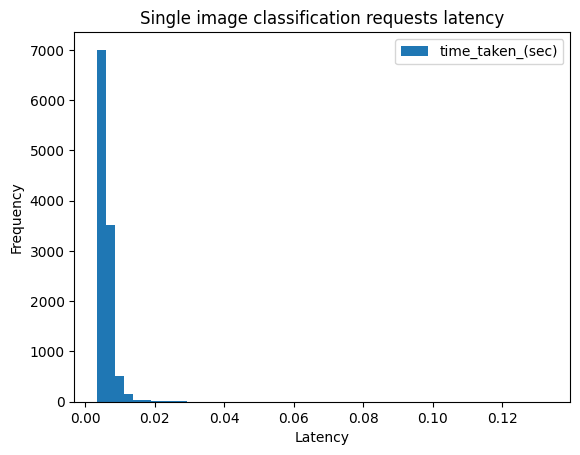

In [69]:
report2.plot.hist(bins=50, title='Single image classification requests latency', xlabel='Latency')

## Tail 99th percentile

In [60]:
report2[report2['time_taken_(sec)'] >= report2.quantile(0.99, axis=0, numeric_only=False).values[0] ]

,time_taken_(sec)
0,0.015563
2,0.017504
5,0.018860
6,0.014776
9,0.035660
...,...
8950,0.014202
9273,0.098775
9276,0.017383
9983,0.057201


## Tail 95th percentile

In [61]:
report2[report2['time_taken_(sec)'] >= report2.quantile(0.95, axis=0, numeric_only=False).values[0] ]

,time_taken_(sec)
0,0.015563
1,0.013519
2,0.017504
3,0.009567
4,0.011220
...,...
9983,0.057201
9984,0.018838
9986,0.012843
9987,0.011479
